<a href="https://colab.research.google.com/github/meliskarayigit/Social-Media-Emotion-Analysis/blob/main/dsai_social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas openpyxl

In [2]:
from google.colab import files
uploaded = files.upload()

Saving social_media_comments.csv to social_media_comments.csv


In [3]:
import pandas as pd

# Excel dosyasını okuyalım
df = pd.read_csv('social_media_comments.csv', encoding='ISO-8859-9')

df

,Tip,Paylaşım
0,Negatif,doğa ağzımıza sıçsa hakkı var
1,Pozitif,anne bir sanatçıdır güzel eseri yavrusudur
2,Negatif,ibrahimin oğlunu koruyan tanrı ben sokayım
3,Negatif,köpeğim suratına sıçsın senin namussuz karı
4,Negatif,ben söğüşledim birazda sen söğüşle
...,...,...
11114,Pozitif,bugün hava güzel
11115,Pozitif,allah akıl fikir versin
11116,Negatif,allah belanı versin
11117,Pozitif,allah akıl fikir versin sana


# VERİ ANALİZİ

In [4]:
df.describe()

,Tip,Paylaşım
count,11119,11117
unique,2,11005
top,Pozitif,allah belanı versin
freq,6115,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tip       11119 non-null  object
 1   Paylaşım  11117 non-null  object
dtypes: object(2)
memory usage: 173.9+ KB


In [6]:
df.isnull().sum()

,0
Tip,0
Paylaşım,2


In [8]:
# Sütun adlarını düzenleyelim
df.rename(columns={"Paylaşım": "Yorum", "Tip": "Duygu"}, inplace=True)

# Eksik verileri kontrol edelim ve temizleyelim
df.dropna(subset=["Yorum"], inplace=True)

df.isnull().sum()

,0
Duygu,0
Yorum,0


StopWord ve Noktolama Temizliği

In [34]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import re
# Özel Türkçe stopword listesi
ozel_stopwords = {
    "bi","bir", "ben", "sen", "biz", "siz", "o", "bu", "şu", "onlar",
    "mı", "mi", "mu", "mü", "var", "yok", "değil", "kadar",
    "gibi", "çok", "böyle", "olsun", "ile", "ve", "ama", "fakat",
    "ki", "da", "de", "şey", "bazı", "hep", "hiç", "neden", "nasıl", "senin", "benim", "sizin"
}

# Stopword temizleme fonksiyonu
def temizle(yorum):
    yorum = re.sub(r'[^\w\s]', '', yorum)  # Noktalama işaretlerini kaldır
    yorum = yorum.lower()  # Küçük harfe çevir
    yorum = " ".join([kelime for kelime in yorum.split() if kelime not in ozel_stopwords])  # Stopword temizleme
    return yorum

df["Yorum"] = df["Yorum"].astype(str).apply(temizle)


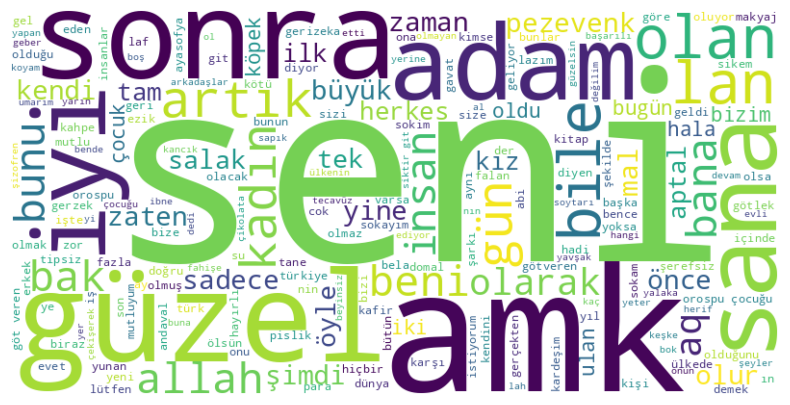

In [49]:
## Paylaşım sütunundaki kelimelerin sık kullanımını göstermek için:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert all elements in 'Paylaşım' column to strings before joining
text = " ".join(str(review) for review in df.Yorum)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

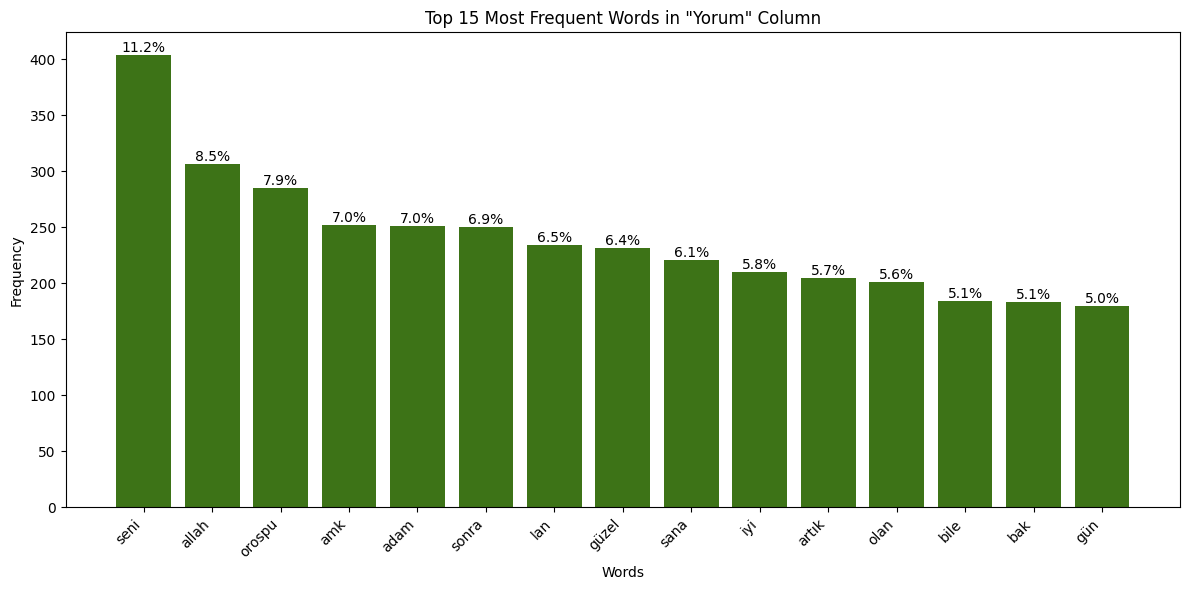

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming 'df' is your DataFrame and 'Paylaşım' is the column with text
# 1. Combine all text from the 'Paylaşım' column
all_text = " ".join(str(review) for review in df.Yorum)

# 2. Split the text into words and count their frequency
word_counts = Counter(all_text.split())

# 3. Get the 15 most common words
top_15_words = word_counts.most_common(15)

# 4. Separate words and frequencies for plotting
words = [word[0] for word in top_15_words]
frequencies = [word[1] for word in top_15_words]

# 5. Calculate percentage for each word
total_words = sum(frequencies)
percentages = [(freq / total_words) * 100 for freq in frequencies]

# 6. Create the bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
bars = plt.bar(words, frequencies, color='#3D7317')
plt.title('Top 15 Most Frequent Words in "Yorum" Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# 7. Add percentage labels above each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

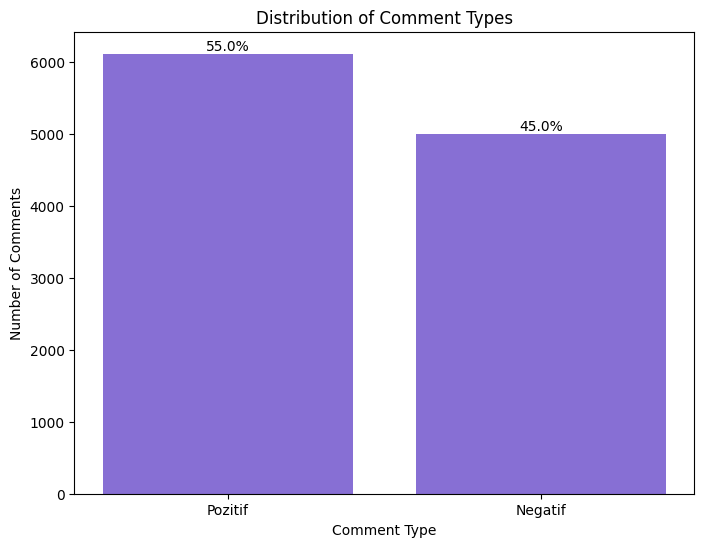

In [18]:
import matplotlib.pyplot as plt
# Assuming 'Type' column exists and has 'Positive' and 'Negative' values
type_counts = df['Duygu'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(type_counts.index, type_counts.values, color= "#876FD4" )  # Store bar objects
plt.title('Distribution of Comment Types')
plt.xlabel('Comment Type')
plt.ylabel('Number of Comments')

# Add percentage labels
total = len(df['Duygu'])  # Total number of comments
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

In [ ]:
df['Paylaşım'] = df['Paylaşım'].str.lower()


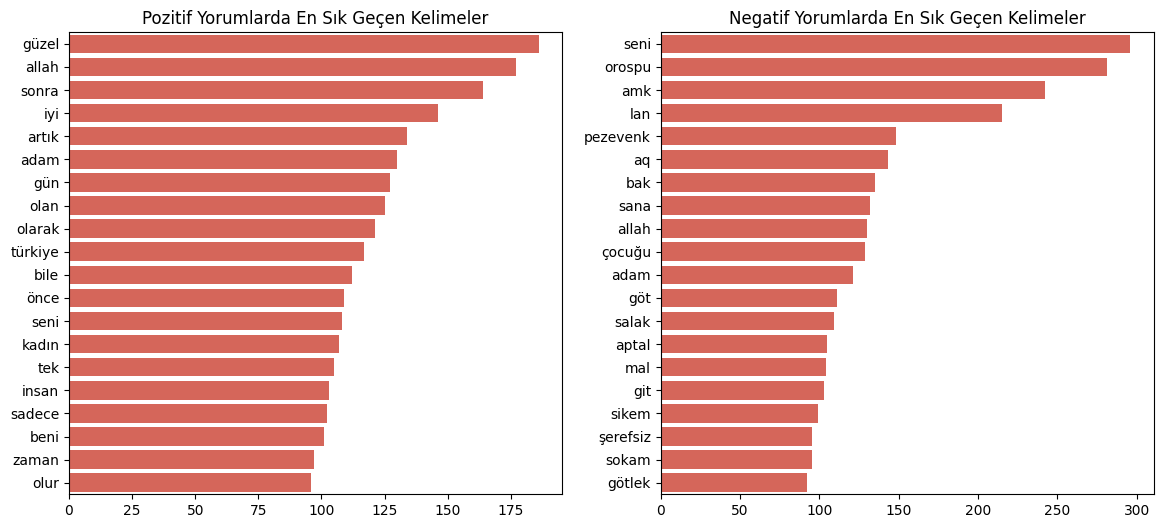

In [51]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Yorumları temizleyelim (büyük/küçük harf, noktalama işaretleri vs.)
df["Temizlenmiş Paylaşım"] = df["Yorum"].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Pozitif ve negatif yorumları ayır
pozitif_yorumlar = " ".join(df[df["Duygu"] == "Pozitif"]["Temizlenmiş Paylaşım"]).split()
negatif_yorumlar = " ".join(df[df["Duygu"] == "Negatif"]["Temizlenmiş Paylaşım"]).split()

# En sık geçen kelimeleri bul
pozitif_sayım = Counter(pozitif_yorumlar)
negatif_sayım = Counter(negatif_yorumlar)

# En sık geçen ilk 20 kelimeyi al
pozitif_en_cok = pozitif_sayım.most_common(20)
negatif_en_cok = negatif_sayım.most_common(20)

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(y=[x[0] for x in pozitif_en_cok], x=[x[1] for x in pozitif_en_cok], ax=axes[0],  color="#ea5545")
axes[0].set_title("Pozitif Yorumlarda En Sık Geçen Kelimeler")
sns.barplot(y=[x[0] for x in negatif_en_cok], x=[x[1] for x in negatif_en_cok], ax=axes[1], color="#ea5545")
axes[1].set_title("Negatif Yorumlarda En Sık Geçen Kelimeler")
plt.show()


# MODEL (SVM)